Linear Regression


    Actual  Predicted
0        6   5.773352
1        5   5.036151
2        7   6.575663
3        6   5.357003
4        5   5.913838
5        6   5.037362
6        5   5.398458
7        6   6.020533
8        4   4.844700
9        5   4.963778
10       5   5.315787
11       5   5.432803
12       6   5.720932
13       5   5.063182
14       6   5.533777
15       6   6.369579
16       7   6.788503
17       5   5.775574
18       5   5.945575
19       4   5.097514
20       7   6.307817
21       6   5.182589
22       6   5.643920
23       4   6.132068
24       6   5.505367


Support Vector Machine


    Actual  Predicted
0        6          5
1        5          6
2        7          6
3        6          6
4        5          6
5        6          5
6        5          6
7        6          6
8        4          6
9        5          5
10       5          6
11       5          6
12       6          6
13       5          5
14       6          6
15       6          6
16     

<Figure size 1080x720 with 0 Axes>

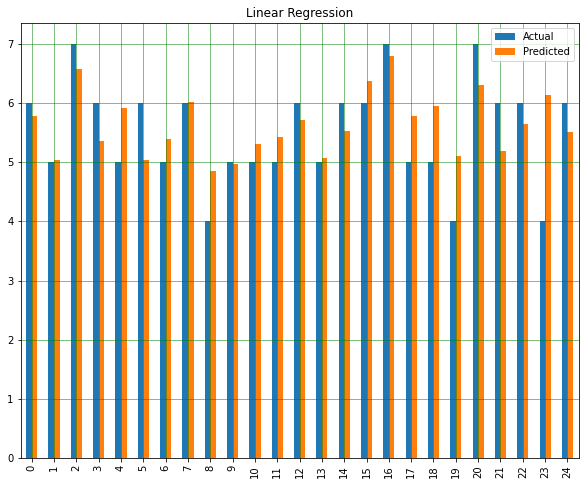

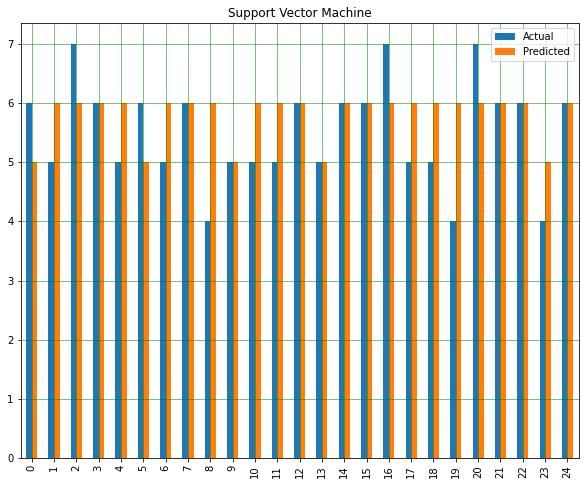

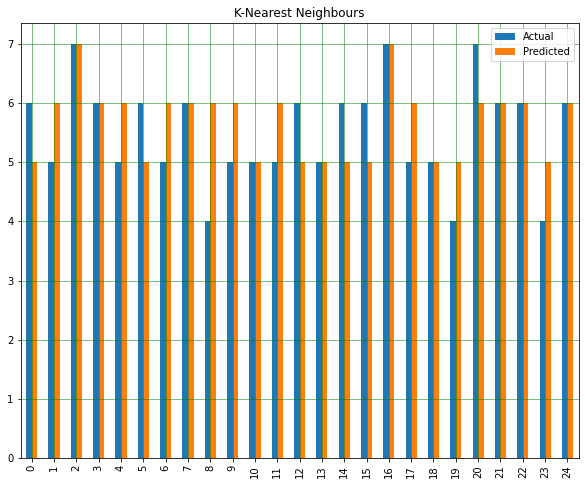

Linear Regression Errors
Mean Absolute Error: 0.48447480789400255
Mean Squared Error: 0.40007252708505475
Root Mean Squared Error: 0.632512867130033


Support Vector Machine Classification Score


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        14
           5       0.60      0.38      0.47       169
           6       0.46      0.79      0.58       170
           7       0.00      0.00      0.00        40
           8       0.00      0.00      0.00         5

    accuracy                           0.50       400
   macro avg       0.18      0.20      0.17       400
weighted avg       0.45      0.50      0.44       400



K-Nearest Neighbours Classification Score


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        14
           5       0.51      0.63      0.57       1

In [4]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,accuracy_score
from sklearn import metrics
%matplotlib inline

dataset = pd.read_csv('./wine/winequality.csv')

dataset.shape

dataset.describe()

# dataset cleaning

dataset.isnull().any()

#fill empty rows if any

dataset = dataset.fillna(method='ffill')

X = dataset[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']]

y = dataset['quality'].values

plt.figure(figsize=(15,10))
plt.tight_layout() #tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area.
# seabornInstance.distplot(dataset['quality'],kde=True)

# y-axis on a seaborn distplot is a probability density function of a kernel density estimation, remember that this is a probability density and not a probability

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)# split test data 25% and train data 75% from the dataset

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

svc = SVC()
svc.fit(X_train,y_train)
pred_svc = svc.predict(X_test)

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
pred_knn=knn.predict(X_test)

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  

y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred_svc})
df2 = df.head(25)
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred_knn})
df3 = df.head(25)

print("Linear Regression")
print("\n")
print(df1)
print("\n")
print("Support Vector Machine")
print("\n")
print(df2)
print("\n")
print("K-Nearest Neighbours")
print("\n")
print(df3)

df1.plot(kind='bar',figsize=(10,8))
plt.title("Linear Regression")
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.savefig("LR.png")
plt.show()
print("\n")
df2.plot(kind='bar',figsize=(10,8))
plt.title("Support Vector Machine")
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.savefig("SVM.png")
plt.show()
print("\n")
df3.plot(kind='bar',figsize=(10,8))
plt.title("K-Nearest Neighbours")
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.savefig("KNN.png")
plt.show()

print("Linear Regression Errors")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("\n")
print("Support Vector Machine Classification Score")
print("\n")
print(classification_report(y_test,pred_svc))
print("\n")
print("K-Nearest Neighbours Classification Score")
print("\n")
print(classification_report(y_test,pred_knn))
#precision - ratio of correctly predicted positive observation to total predicted positive observation Formula :- Precision = TP/TP+FP
#recall - Recall is the ratio of correctly predicted positive observations to the all observations in actual class  Formula :- Recall = TP/TP+FN
#F1 score - F1 Score is the weighted average of Precision and Recall. Formula :- F1 Score = 2*(Recall * Precision) / (Recall + Precision)